<a href="https://colab.research.google.com/github/t1seo/AIFFEL/blob/master/EXPLORATION/02/%5BE-02%5Dscikit-learn_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다
- `load_digits` : 손글씨 이미지 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits))

## (1) 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings(action='ignore')

## (2) 데이터 준비

In [2]:
digits = load_digits()

print(dir(digits))

['DESCR', 'data', 'images', 'target', 'target_names']


In [3]:
def print_data_info(scikit_data, feature_names=False):
    print("data의 type: ", type(scikit_data))
    print("data의 shape: ", scikit_data.data.shape)
    print()
    
    if feature_names:
        print("feature_name 출력: ")
        print(scikit_data.feature_names)
        print()
        print("feature_name의 type: ", type(scikit_data.feature_names))
        print("feature_name의 shape: ", len(scikit_data.feature_names))
        print()

    print("target_name: ", scikit_data.target_names)
    print("target_name의 type: ", type(scikit_data.target_names))
    print("target_name의 shape: ", len(scikit_data.target_names))
    print()


    print("target의 type: ", type(scikit_data.target))
    print("target의 shape: ", scikit_data.target.shape)
    print()

## (3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [4]:
print_data_info(digits)

data의 type:  <class 'sklearn.utils.Bunch'>
data의 shape:  (1797, 64)

target_name:  [0 1 2 3 4 5 6 7 8 9]
target_name의 type:  <class 'numpy.ndarray'>
target_name의 shape:  10

target의 type:  <class 'numpy.ndarray'>
target의 shape:  (1797,)



In [5]:
# 0번 데이터의 내용확인
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits.target.shape

(1797,)

- `digit_data`에 feature가 들어 있고, `digit_target`에 target이 들어있다.

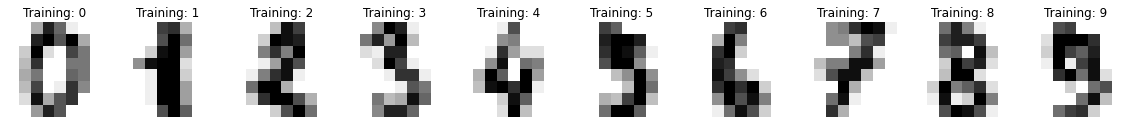

In [8]:
import matplotlib.pyplot as plt

# 이미지 확인
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 20))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [9]:
# feature data와 label data 지정
feature_data = digits.data
label_data = digits.target

## (4) train, test 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data, 
                                                    label_data,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"학습 데이터: {X_train.shape}, {y_train.shape}")
print(f"테스트 데이터: {X_test.shape}, {y_test.shape}")

학습 데이터: (1437, 64), (1437,)
테스트 데이터: (360, 64), (360,)


## (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

어떤 모델이 가장 좋은 성능을 보일까?

### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"Decision Tree 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.88      0.79      0.83        28
           2       0.81      0.79      0.80        33
           3       0.75      0.88      0.81        34
           4       0.78      0.83      0.80        46
           5       0.89      0.87      0.88        47
           6       0.87      0.97      0.92        35
           7       0.88      0.85      0.87        34
           8       0.91      0.67      0.77        30
           9       0.82      0.90      0.86        40

    accuracy                           0.85       360
   macro avg       0.86      0.84      0.85       360
weighted avg       0.85      0.85      0.85       360

Decision Tree 정확도: 0.847


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"Random Forest 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Random Forest 정확도: 0.981


### Support Vector Machine (SVM)

In [13]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

svm_model = svm.SVC()
svm_model.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = svm_model.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SVM 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

SVM 정확도: 0.981


### Stochastic Gradient Descent Classifier (SGDClassifier)

In [14]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier()
sgc_clf.fit(X_train, y_train)
pred = sgc_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SGDClassfier 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       0.98      0.98      0.98        46
           5       0.94      0.94      0.94        47
           6       0.92      0.97      0.94        35
           7       1.00      0.97      0.99        34
           8       0.90      0.87      0.88        30
           9       0.95      0.93      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

SGDClassfier 정확도: 0.958


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

lr = LogisticRegression(max_iter=100)
lr.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = lr.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"LogisticRegression 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

LogisticRegression 정확도: 0.972


## (6) 모델을 평가해 보기

**모델별 정확도**
- Decision Tree: 0.850
- Random Forest: 0.981
- SVM: 0.981
- SGCClassifier: 0.956
- LogisticRegression: 0.972

손글씨 분류의 경우 잘 예측을 하는 것이 중요하고 예측이 틀렸다고 하더라고 크게 문제되지 않기 때문에 **정확도(Accuracy)**를 평가 지표로 선택하는 것이 타당할 것이다.

정확도를 기준으로 봤을 때 SVM과 Random Forest가 가장 높은 정확도를 보였다.

# 2-12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다
- `load_wine` : 와인 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine))

## (1) 필요한 모듈 import하기

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [17]:
wine = load_wine()

print(dir(wine))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


## (3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [18]:
print_data_info(wine, feature_names=True)

data의 type:  <class 'sklearn.utils.Bunch'>
data의 shape:  (178, 13)

feature_name 출력: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

feature_name의 type:  <class 'list'>
feature_name의 shape:  13

target_name:  ['class_0' 'class_1' 'class_2']
target_name의 type:  <class 'numpy.ndarray'>
target_name의 shape:  3

target의 type:  <class 'numpy.ndarray'>
target의 shape:  (178,)



- 와인 데이터는에는 총 178개의 데이터가 있고, target에는 세 가지 종류의 와인이 있는 것을 확인 할 수 있다.

In [19]:
import pandas as pd

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['label'] = wine.target
wine_df['label'].value_counts()

1    71
0    59
2    48
Name: label, dtype: int64

In [20]:
# feature data와 label data 지정
wine_data = wine.data
wine_target = wine.target

## (4) train, test 데이터 분리

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_target,
                                                   test_size=0.2,
                                                   random_state=42)

print(f"학습 데이터: {X_train.shape}, {y_train.shape}")
print(f"테스트 데이터: {X_test.shape}, {y_test.shape}")

학습 데이터: (142, 13), (142,)
테스트 데이터: (36, 13), (36,)


## (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

어떤 모델이 가장 좋은 성능을 보일까?

### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"Decision Tree 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Decision Tree 정확도: 0.944


### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"Random Forest 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Random Forest 정확도: 1.000


### Support Vector Machine (SVM)

In [24]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

svm_model = svm.SVC()
svm_model.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = svm_model.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SVM 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

SVM 정확도: 1.000


### Stochastic Gradient Descent Classifier (SGDClassifier)

In [25]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier()
sgc_clf.fit(X_train, y_train)
pred = sgc_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SGDClassfier 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       1.00      0.21      0.35        14
           2       0.27      1.00      0.42         8

    accuracy                           0.39        36
   macro avg       0.76      0.48      0.38        36
weighted avg       0.84      0.39      0.37        36

SGDClassfier 정확도: 0.389


### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

lr = LogisticRegression(max_iter=100)
lr.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = lr.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"LogisticRegression 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

LogisticRegression 정확도: 1.000


## (6) 모델을 평가해 보기

와인을 분류하는 경우에도 정확도가 가장 중요한 지표가 될 것이다. 

Random Forest, SVM, Logistic Regression이 세 모델의 정확도가 모두 100%가 나왔으므로 이 세 모델 중 하나로 와인 분류 예측에 사용하면 될 것이다.



# 2-13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다


- `load_breast_cancer` : 유방암 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer))

- 재현율이 중요

## (1) 필요한 모듈 import하기

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [28]:
breast_cancer = load_breast_cancer()

print(dir(breast_cancer))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


## (3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [29]:
print_data_info(breast_cancer, feature_names=True)

data의 type:  <class 'sklearn.utils.Bunch'>
data의 shape:  (569, 30)

feature_name 출력: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

feature_name의 type:  <class 'numpy.ndarray'>
feature_name의 shape:  30

target_name:  ['malignant' 'benign']
target_name의 type:  <class 'numpy.ndarray'>
target_name의 shape:  2

target의 type:  <class 'numpy.ndarray'>
target의 shape:  (569,)



- 유방암 데이터 셋에는 총 569개의 데이터가 있다.
- feature는 30종류가 있고, target은 양성인지 음성인지의 2가지 종류로 구성되어 있다. 

In [30]:
cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
cancer_df['label'] = breast_cancer.target
cancer_df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [31]:
# feature data와 target data 분리
cancer_data = breast_cancer.data
cancer_target = breast_cancer.target

## (4) train, test 데이터 분리

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_data,
                                                   cancer_target,
                                                   test_size=0.2,
                                                   random_state=42)
print(f"학습 데이터: {X_train.shape}, {y_train.shape}")
print(f"테스트 데이터: {X_test.shape}, {y_test.shape}")

학습 데이터: (455, 30), (455,)
테스트 데이터: (114, 30), (114,)


## (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

어떤 모델이 가장 좋은 성능을 보일까?

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)

print(f"Decision Tree 정확도: {accuracy:.3f}")
print(f"Decision Tree 재현율: {recall:.3f}")

Decision Tree 정확도: 0.930
Decision Tree 재현율: 0.944


### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)

print(f"Random Forest 정확도: {accuracy:.3f}")
print(f"Random Forest 재현율: {recall:.3f}")

Random Forest 정확도: 0.965
Random Forest 재현율: 0.986


### Support Vector Machine (SVM)

In [35]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

svm_model = svm.SVC()
svm_model.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = svm_model.predict(test_scaled)

accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)

print(f"SVM 정확도: {accuracy:.3f}")
print(f"SVM 재현율: {recall:.3f}")

SVM 정확도: 0.982
SVM 재현율: 1.000


### Stochastic Gradient Descent Classifier (SGDClassifier)

In [36]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier()
sgc_clf.fit(X_train, y_train)
pred = sgc_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)

print(f"SGDClassifier 정확도: {accuracy:.3f}")
print(f"SGCClassifier 재현율: {recall:.3f}")

SGDClassifier 정확도: 0.886
SGCClassifier 재현율: 0.817


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

lr = LogisticRegression(max_iter=100)
lr.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = lr.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)

print(f"SGDClassifier 정확도: {accuracy:.3f}")
print(f"SGCClassifier 재현율: {recall:.3f}")

SGDClassifier 정확도: 0.974
SGCClassifier 재현율: 0.986


## (6) 모델을 평가해 보기

유방암을 진단하는데 양성인 환자를 음성이라고 진단을 하면 안된다. 그래서 정확도보다는 **재현율**이 중요하다. 

재현율이 가장 높게 나오는 모델은 SVM으로 유방암을 예측하는 모델에는 SVM이 가장 적합하다.

# 회고

- 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)에 대해 많이 헷갈려했었는데 이번 노드를 하면서 확실히 알 수 있었다.
- 좀 더 다양한 시도를 하고 싶었는데 시간상의 이유로 좀 더 하지 못한 것이 좀 아쉽다. (ROC-AUC 그래프 그리기 등등..)
- SVM과 LogisticRegression 모델을 사용할 때는 `StandardScaler`를 데이터셋에 반드시 적용시켜야 한다는 것을 알게 되었다.
    - [[Python] 어떤 스케일러를 쓸 것인가?](https://mkjjo.github.io/python/2019/01/10/scaler.html)
    - [로지스틱회귀(Logistic Regression) – 파이썬 코드 예제](http://hleecaster.com/ml-logistic-regression-example/)